## Code to generate Figure S1A graphics
For each peptide simulation, merged replicate trajectories were analyzed using 'soursop' to determine per-frame phi and psi angles for the central phosphoresidue. This notebook reads in the text files from /data containing phi [0] and psi [1] angles for all trajectory frames. For comparing the overly strong true -2 charge state with the optimal parameter combination.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
## load phi-psi angle data from all simulations and organize ##

pS2_opt = np.loadtxt('data/pS-opls-2_phipsi.txt')
pT2_opt = np.loadtxt('data/pT-opls-2_phipsi.txt')
pS2_true = np.loadtxt('data/pS-opls_TRUE-2_phipsi.txt')
pT2_true = np.loadtxt('data/pT-opls_TRUE-2_phipsi.txt')

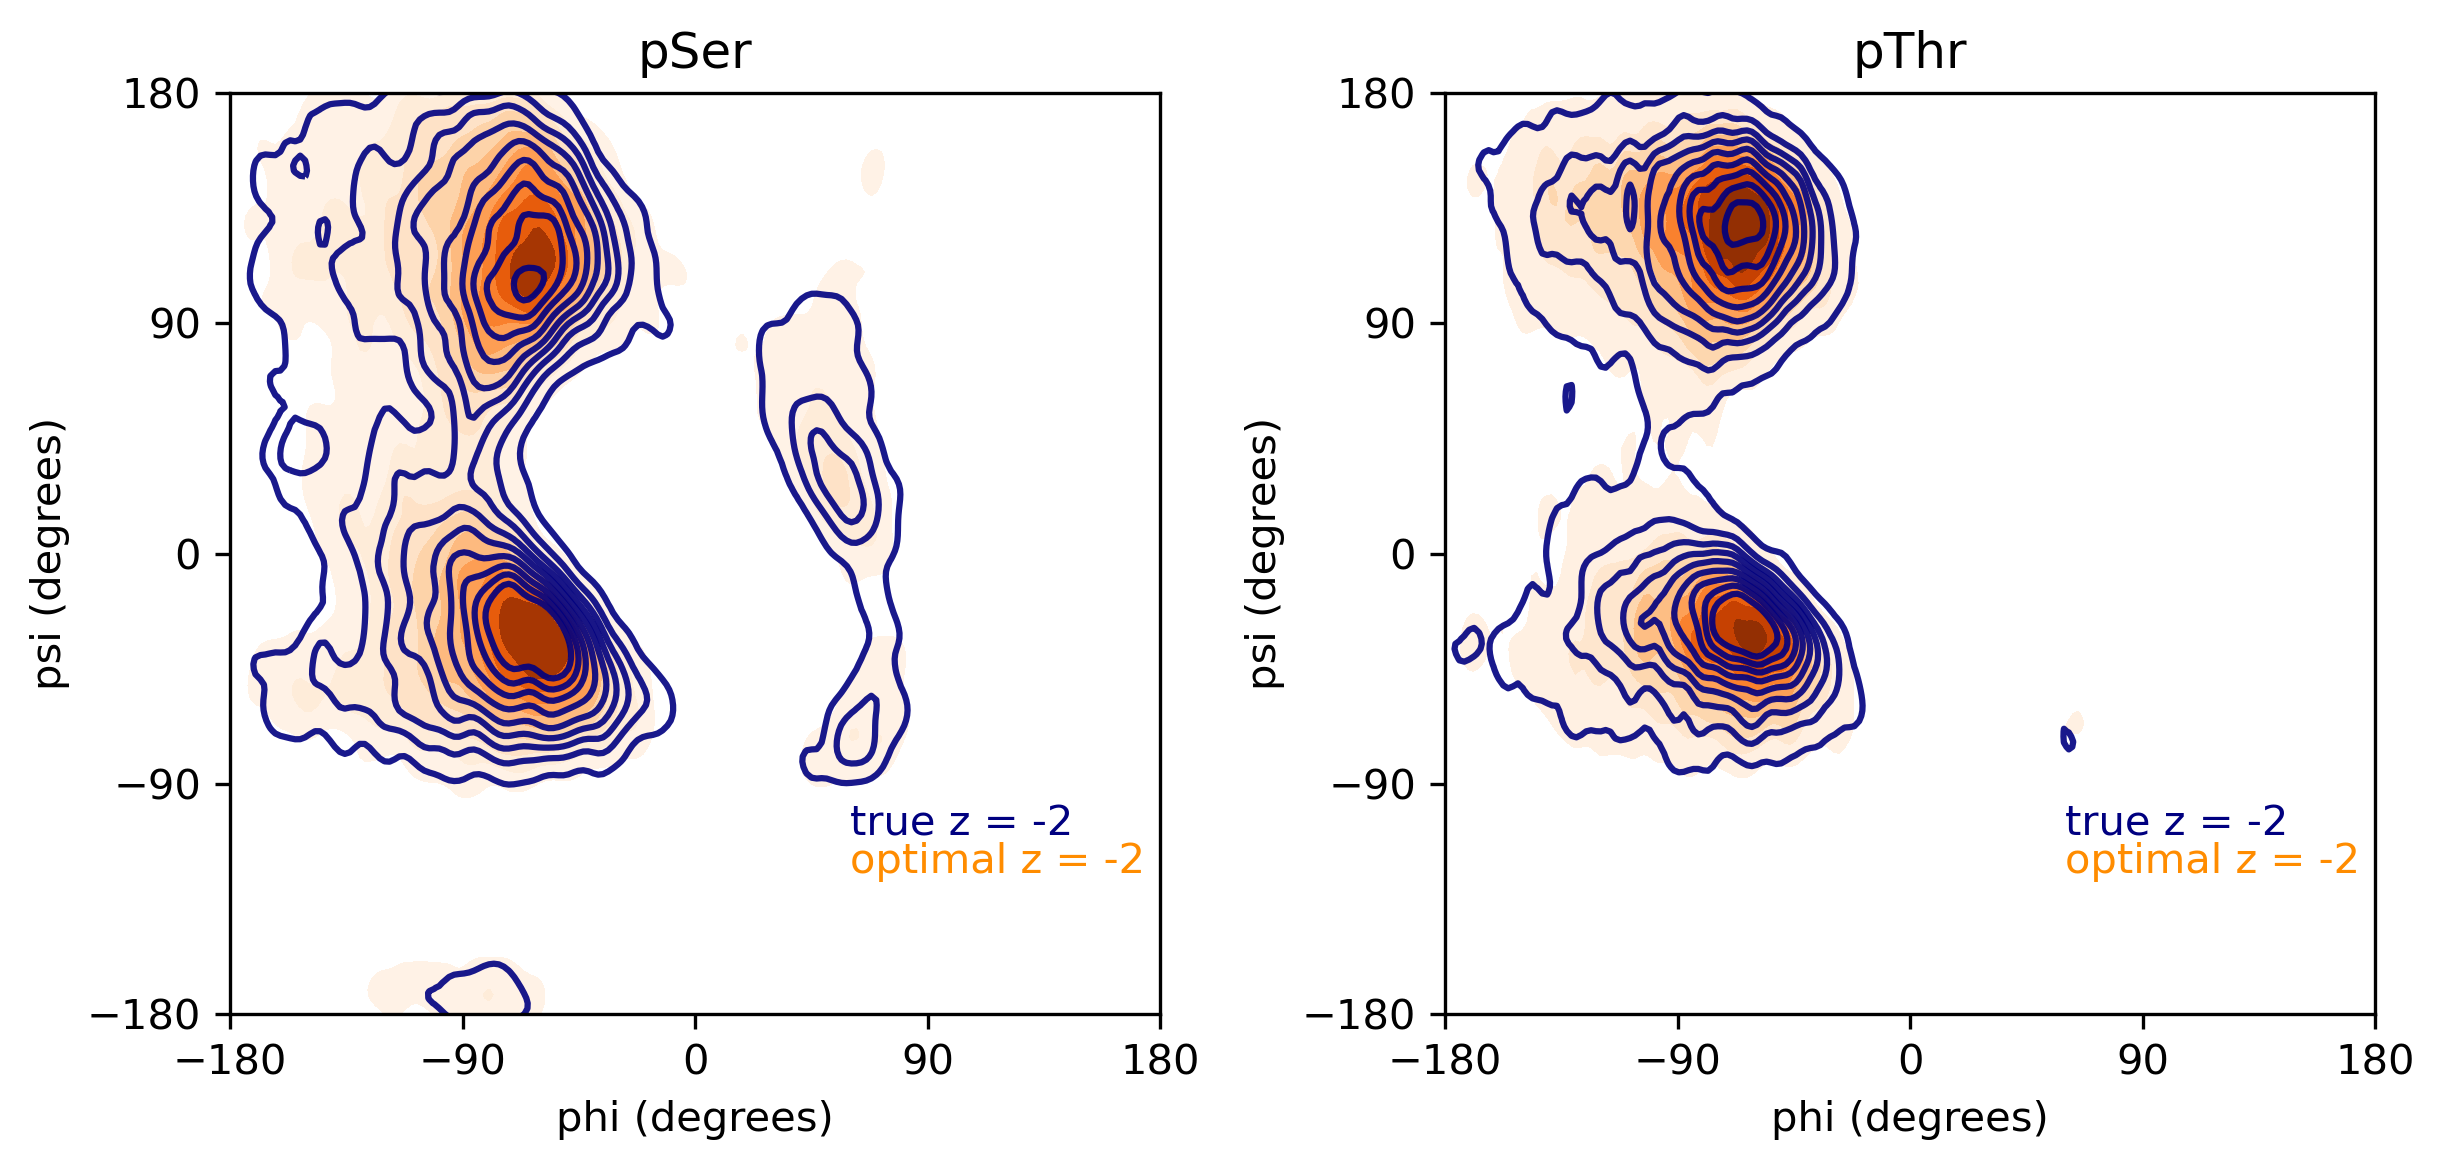

In [18]:
## generate Ramachandran plot overlays to compare force fields (OPLS vs. CHARMM36 (c36)) (PANEL A) ##
fig, axes = plt.subplots(1, 2, figsize = (8.25, 4), dpi = 300)

# plot pS on left subplot
sns.kdeplot(ax = axes[0], x = pS2_opt[:,0], y = pS2_opt[:,1], fill = False, color = 'navy', alpha = 0.9, bw_adjust = 0.4)
sns.kdeplot(ax = axes[0], x = pS2_true[:,0], y = pS2_true[:,1], fill = True, cmap = "Oranges", bw_adjust = 0.4)

# plot pT on right subplot
sns.kdeplot(ax = axes[1], x = pT2_opt[:,0], y = pT2_opt[:,1], fill = False, color = 'navy', alpha = 0.9, bw_adjust = 0.4)
sns.kdeplot(ax = axes[1], x = pT2_true[:,0], y = pT2_true[:,1], fill = True, cmap = "Oranges", bw_adjust = 0.4)

for ax in range(2):
    axes[ax].set_ylabel('psi (degrees)')
    axes[ax].set_xlabel('phi (degrees)')
    axes[ax].set_ylim([-180, 180])
    axes[ax].set_xlim([-180, 180])
    axes[ax].annotate('optimal z = -2', xy = (60, -125), ha = 'left', color = 'darkorange')
    axes[ax].annotate('true z = -2', xy = (60, -110), ha = 'left', color = 'navy')
    axes[ax].set_xticks([-180, -90, 0, 90, 180])
    axes[ax].set_yticks([-180, -90, 0, 90, 180])

axes[0].set_title('pSer')
axes[1].set_title('pThr')

fig.tight_layout()

plt.savefig('ramachandran_maps_S1A.pdf', format = 'pdf', dpi = 300)

plt.show()